### Análise dos resultados gerados com SVM - 35k

Análise dos resuntados produzidos pelo SVM do conjunto com 35k amostras para cada classe.

In [1]:
%run './../../top_k.ipynb'
%run './../../plot_confusion_matrix.ipynb'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix, precision_score, 
recall_score)

%matplotlib inline

In [2]:
random_state = 47
np.random.seed(seed=random_state)

In [3]:
labels = np.load('./labels_35k_OnlyTrigram.npy')

In [4]:
saidas = np.load('./saidas_35k_OnlyTrigram.npy')

In [5]:
print(labels.shape)
print(saidas.shape)

(148679,)
(148679,)


In [6]:
labels

array([13,  8,  6, ...,  0,  9,  3])

In [7]:
saidas

array([13,  8,  6, ...,  0,  1, 10])

### Classification report

In [8]:
print(classification_report(labels, saidas))

             precision    recall  f1-score   support

          0       0.73      0.70      0.72     10564
          1       0.46      0.49      0.47     10820
          2       0.36      0.50      0.42     10685
          3       0.49      0.50      0.49     10816
          4       0.63      0.61      0.62     10701
          5       0.62      0.57      0.59     10957
          6       0.74      0.61      0.67      8544
          7       0.47      0.47      0.47     10688
          8       0.46      0.44      0.45     10940
          9       0.65      0.64      0.64     10800
         10       0.55      0.52      0.53     10830
         11       0.42      0.48      0.45     10756
         12       0.51      0.46      0.48     10786
         13       0.71      0.62      0.66     10792

avg / total       0.55      0.54      0.55    148679



### Transformando em labels

Transformando novamente classes em labels para facilitar interpretação dos resultados.

In [9]:
dict_cat = {
    0: 'Adult',
    1: 'Arts',
    2: 'Business',
    3: 'Computers',
    4: 'Games',
    5: 'Health',
    6: 'Home',
    7: 'Kids',
    8: 'Recreation',
    9: 'Reference',
    10: 'Science',
    11: 'Shopping',
    12: 'Society',
    13: 'Sports'
}

def to_category_name(item):
    return dict_cat[item]

In [10]:
saidas_label = np.zeros(shape=(saidas.shape[0]), dtype='object')
labels_label = np.zeros(shape=(labels.shape[0]), dtype='object')

for i in range(labels.shape[0]):
    saidas_label[i] = to_category_name(saidas[i])
    labels_label[i] = to_category_name(labels[i])

In [11]:
print(saidas_label)
print(labels_label)

['Sports' 'Recreation' 'Home' ..., 'Adult' 'Arts' 'Science']
['Sports' 'Recreation' 'Home' ..., 'Adult' 'Reference' 'Computers']


In [12]:
#Validando transformação
pos = 0
print(labels[pos])
print(labels_label[pos])

print(saidas[pos])
print(saidas_label[pos])

13
Sports
13
Sports


### Classification report

In [13]:
print(classification_report(labels_label, saidas_label))

             precision    recall  f1-score   support

      Adult       0.73      0.70      0.72     10564
       Arts       0.46      0.49      0.47     10820
   Business       0.36      0.50      0.42     10685
  Computers       0.49      0.50      0.49     10816
      Games       0.63      0.61      0.62     10701
     Health       0.62      0.57      0.59     10957
       Home       0.74      0.61      0.67      8544
       Kids       0.47      0.47      0.47     10688
 Recreation       0.46      0.44      0.45     10940
  Reference       0.65      0.64      0.64     10800
    Science       0.55      0.52      0.53     10830
   Shopping       0.42      0.48      0.45     10756
    Society       0.51      0.46      0.48     10786
     Sports       0.71      0.62      0.66     10792

avg / total       0.55      0.54      0.55    148679



### Precisao exata por classe

In [14]:
print(precision_score(labels_label, saidas_label, average=None))

[ 0.73353737  0.45584932  0.3574554   0.48568351  0.63126815  0.61532354
  0.73642867  0.47433496  0.45940253  0.65283593  0.54607309  0.42064978
  0.51056627  0.70957895]


### Recall exato por classe

In [15]:
print(recall_score(labels_label, saidas_label, average=None))

[ 0.70333207  0.48761553  0.49695835  0.50027737  0.6093823   0.56584832
  0.61446629  0.4738024   0.43857404  0.63518519  0.51874423  0.48029007
  0.46143149  0.62462936]


### Accuracy

In [16]:
print(accuracy_score(labels_label, saidas_label))

0.542255463112


### Precision weighted

In [17]:
print(precision_score(labels_label, saidas_label, average='weighted'))

0.55349240677


### Confusion matrix

In [25]:
class_counts = np.unique(saidas_label, return_counts=True)
class_counts

(array(['Adult', 'Arts', 'Business', 'Computers', 'Games', 'Health', 'Home',
        'Kids', 'Recreation', 'Reference', 'Science', 'Shopping', 'Society',
        'Sports'], dtype=object),
 array([10129, 11574, 14855, 11141, 10330, 10076,  7129, 10676, 10444,
        10508, 10288, 12281,  9748,  9500]))

In [19]:
class_names = ['Adult', 'Arts', 'Business', 'Computers', 'Games', 'Health', 'Home',
        'Kids', 'Recreation', 'Reference', 'Science', 'Shopping', 'Society',
        'Sports']

In [20]:
cm = confusion_matrix(labels_label, saidas_label)

Confusion matrix, without normalization
[[7430  443  543  309  153  103   69  376  254   45   64  512  153  110]
 [ 345 5276  689  383  413  229  165  585  583  291  278  817  555  211]
 [ 259  407 5310 1082  118  330   95  188  446  130  336 1520  215  249]
 [ 223  413 1620 5411  273  243  113  340  312  322  568  615  258  105]
 [ 155  565  374  527 6521  122   92  999  368   76  153  290  241  218]
 [ 120  347  724  344  140 6200  229  314  381  414  495  407  664  178]
 [ 102  341  383  248  120  286 5250  258  319   98  252  442  330  115]
 [ 341  688  291  259 1312  212  151 5064  597  308  644  208  428  185]
 [ 292  707  789  425  354  371  219  620 4798  193  315  883  494  480]
 [  81  287  427  373   85  407   95  313  222 6860  765  210  485  190]
 [ 114  319  838  565  110  429  137  649  301  918 5618  282  463   87]
 [ 330  599 1809  584  183  270  209  146  658   80  128 5166  180  414]
 [ 188  766  566  378  264  637  228  505  543  555  542  420 4977  217]
 [ 149  416

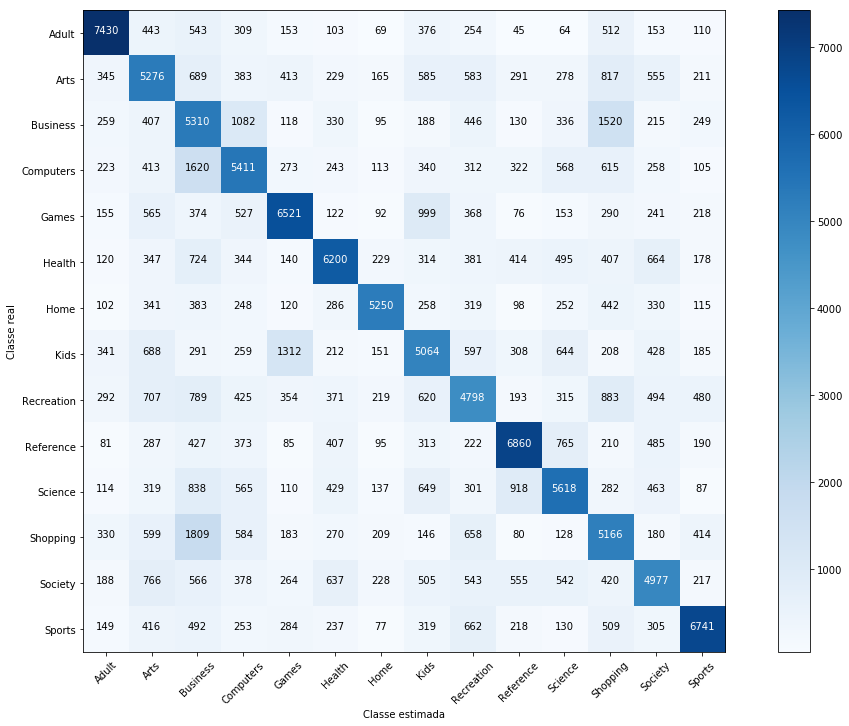

In [21]:
plt.figure(figsize=(6*2.5,4*2.5))
plot_confusion_matrix(cm, classes=class_names,
                      title='')